In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandahouse as ph
%matplotlib inline

In [2]:

connection = {
    'host': '',
    'database':'',
    'user':'',
    'password':''
}


In [5]:
q = """
    SELECT exp_group, user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) between '2023-11-11' and '2023-11-17'
    and exp_group in (2,3)
    GROUP BY exp_group, user_id
"""
df = ph.read_clickhouse(q, connection=connection)
df

,exp_group,user_id,likes,views,ctr
0,3,115383,38,248,0.153226
1,3,10326,24,132,0.181818
2,3,123580,25,122,0.204918
3,2,131473,19,98,0.193878
4,2,23985,12,44,0.272727
...,...,...,...,...,...
16782,3,122008,20,123,0.162602
16783,2,25383,2,18,0.111111
16784,3,122190,15,56,0.267857
16785,2,108927,16,51,0.313725


In [6]:
from scipy.stats import ttest_ind

users_num = 500

def get_pvalue(): 
    A_1 = df[df.exp_group == 2].ctr.sample(n = users_num).values
    A_2 = df[df.exp_group == 3].ctr.sample(n = users_num).values

    return ttest_ind(A_1, A_2)[1]

In [7]:
pvalues = [get_pvalue() for _ in range(10000)]

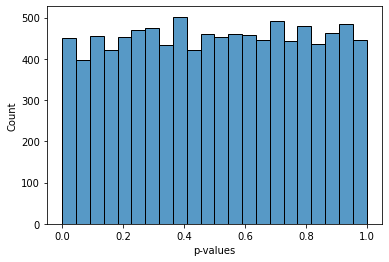

In [8]:
sns.histplot(pvalues)
plt.xlabel('p-values')
plt.show()

In [9]:
np.mean(np.array(pvalues) < 0.05)

0.0485

Система сплитования работает корректно.

Доля ложноположительных ошибок примерно равна выбранному уровню значимости.

Статистические значимые различия между 0 и 1 группой получились в 4.6% случаев